In [1]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import datetime

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]

plt.rc('font', size=14)

In [3]:
np.random.seed(0)

In [4]:
y = np.arange(0,100,1) + np.random.normal(0,10,100)

In [5]:
sma = pd.Series(y).rolling(20).mean()

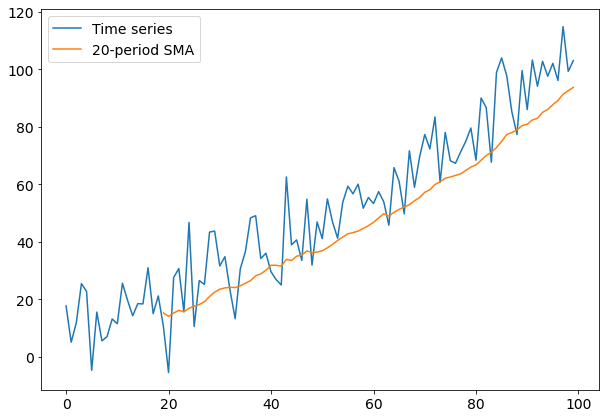

In [6]:
plt.plot(y,label="Time series")
plt.plot(sma,label="20-period SMA")

plt.legend()
plt.show()

In [7]:
n_forward = 40
# name = 'GLD'
# start_date = "2010-01-01"
# end_date = "2020-06-15"


In [8]:
# ticker = yfinance.Ticker("FB")
# data = ticker.history(interval="1d",start='2010-01-01',end=end_date)
data=pd.read_csv("C:\\Users\Grant\Desktop\work_git\work\data\\1d\ZILUSDT_1d.csv", index_col="Time")

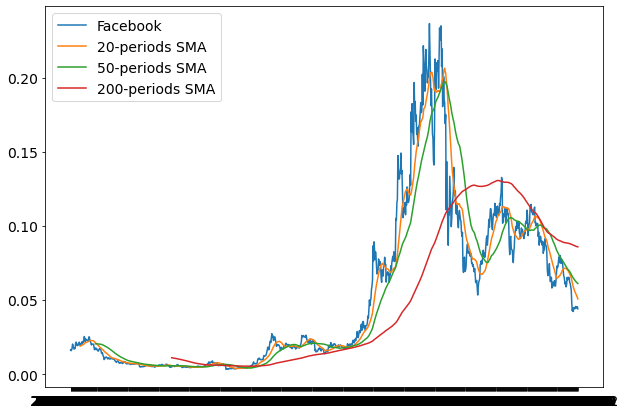

In [9]:
plt.plot(data['Close'],label='Facebook')


plt.plot(data['Close'].rolling(20).mean(),label = "20-periods SMA")
plt.plot(data['Close'].rolling(50).mean(),label = "50-periods SMA")
plt.plot(data['Close'].rolling(200).mean(),label = "200-periods SMA")

plt.legend()
# plt.xlim((datetime.date(2021,1,1),datetime.date(2021,6,15)))
# plt.ylim((100,250))
plt.show()

In [10]:

# ticker = yfinance.Ticker(name)
# data = ticker.history(interval="1d",start=start_date,end=end_date)

data['Forward Close'] = data['Close'].shift(-n_forward)

data['Forward Return'] = (data['Forward Close'] - data['Close'])/data['Close']

In [11]:
result = []
train_size = 0.6

for sma_length in range(20,500):
  
  data['SMA'] = data['Close'].rolling(sma_length).mean()
  data['input'] = [int(x) for x in data['Close'] > data['SMA']]
  
  df = data.dropna()

  training = df.head(int(train_size * df.shape[0]))
  test = df.tail(int((1 - train_size) * df.shape[0]))
  
  tr_returns = training[training['input'] == 1]['Forward Return']
  test_returns = test[test['input'] == 1]['Forward Return']

  mean_forward_return_training = tr_returns.mean()
  mean_forward_return_test = test_returns.mean()

  pvalue = ttest_ind(tr_returns,test_returns,equal_var=False)[1]
 
  result.append({
      'sma_length':sma_length,
      'training_forward_return': mean_forward_return_training,
      'test_forward_return': mean_forward_return_test,
      'p-value':pvalue
  })

In [12]:
result.sort(key = lambda x : -x['training_forward_return'])

In [13]:
result[0]

{'sma_length': 36,
 'training_forward_return': 0.5653505481939581,
 'test_forward_return': 0.14194087231769256,
 'p-value': 1.0508998978726838e-08}

In [14]:
best_sma = result[0]['sma_length']
data['SMA'] = data['Close'].rolling(best_sma).mean()

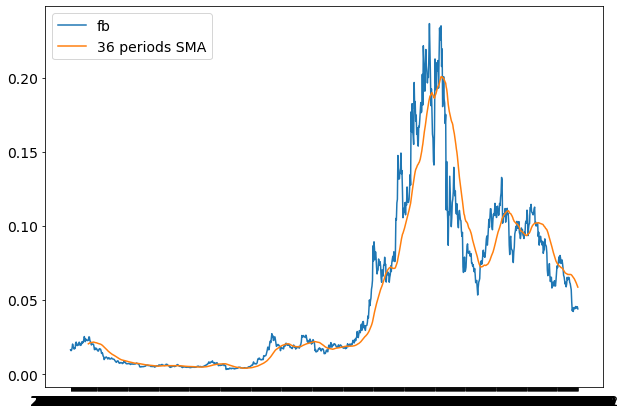

In [16]:
plt.plot(data['Close'],label="fb")

plt.plot(data['SMA'],label = "{} periods SMA".format(best_sma))

plt.legend()
plt.show()